In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.express as px


## Reads in all sheets in Riket / 0

## A)

In [2]:
df_english= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Engelska", skiprows= 8)
df_math= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Matematik", skiprows= 8)
df_swedish= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska", skiprows= 8)
df_swedish2= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska som andraspråk", skiprows= 8)
df_rapport= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Rapportbeskrivning och def.")
df_english

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [3]:
dfs= {
    "English": df_english,
    "Math": df_math,
    "Swedish": df_swedish,
    "Swedish2": df_swedish2,
    "Report": df_rapport
}
labels= [
    "",
    "",
    "(A-F)",
    "(A-F)",
    "(A-F)",
    "%(A-E)",
    "%(A-E)",
    "%(A-E)",
    "(Poäng)",
    "(Poäng)",
    "(Poäng)"
]
columns_copy= []

for subject in dfs:
    
    for column in dfs[subject].columns:
        dfs[subject][column] = dfs[subject][column].replace("..", 0)
        
    dfs[subject].columns= dfs[subject].columns.str.replace(" "[0:], "")
    dfs[subject]= dfs[subject].rename(columns= {"Typavhuvudman": "Huvudman"})
    columns_copy= dfs[subject].columns.tolist()
    columns_copy= [f"{col}{label}" for col, label in zip(dfs[subject].columns, labels)]
    
    dfs[subject].columns= columns_copy
    
df_english= dfs["English"]
df_math= dfs["Math"]
df_swedish= dfs["Swedish"]
df_swedish2= dfs["Swedish2"]
df_rapport= dfs["Report"]
df_swedish2

C:\Users\milto\AppData\Local\Temp\ipykernel_2044\3370189821.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[subject][column] = dfs[subject][column].replace("..", 0)


,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12.0,10.4
3,Riket,Skolverket,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Collections

In [4]:
dfs= [
    df_english,
    df_math,
    df_swedish,
    df_swedish2
]
colors = {
    "RED1": "#D60C00",
    "YELLOW1": "#F4D000",
    "BLUE1": "#1400F4",
    "BLUE2": "#00204E",
    "GREEN1": "#4DF400",
    "GRAY1": "#292929"
}
bar_colors = [
    colors["BLUE1"],
    colors["RED1"],
    colors["YELLOW1"],
    colors["GREEN1"]
]
subjects = [
    "English",
    "Math",
    "Swedish",
    "Swedish2"
]
total_points_persubject= [df.loc[0, "Totalt(Poäng)"]for df in dfs]

## B)

In [5]:
df_math

,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [6]:
girls_f= round(df_math.loc[0, "Flickor(A-F)"]- df_math.loc[0, "Flickor(A-F)"]* (df_math.loc[0, "Flickor%(A-E)"]/ 100), 2)
boys_f= round(df_math.loc[0, "Pojkar(A-F)"]- df_math.loc[0, "Pojkar(A-F)"]* (df_math.loc[0, "Pojkar%(A-E)"]/ 100), 2)
grades_f= round(girls_f+ boys_f, 2)
grades_f

11622.81

## C)

Text(0.5, 1.0, 'Total subject score in Sweden')

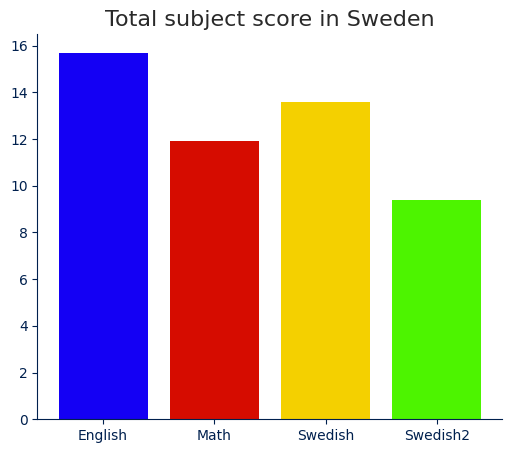

In [7]:
fig, ax= plt.subplots(figsize= (6, 5))
ax.bar(subjects, total_points_persubject, color= bar_colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.spines["left"].set_color(colors["BLUE2"])
ax.tick_params(colors= colors["BLUE2"])
ax.set_title("Total subject score in Sweden", color= colors["GRAY1"], fontsize= 16)

## D)

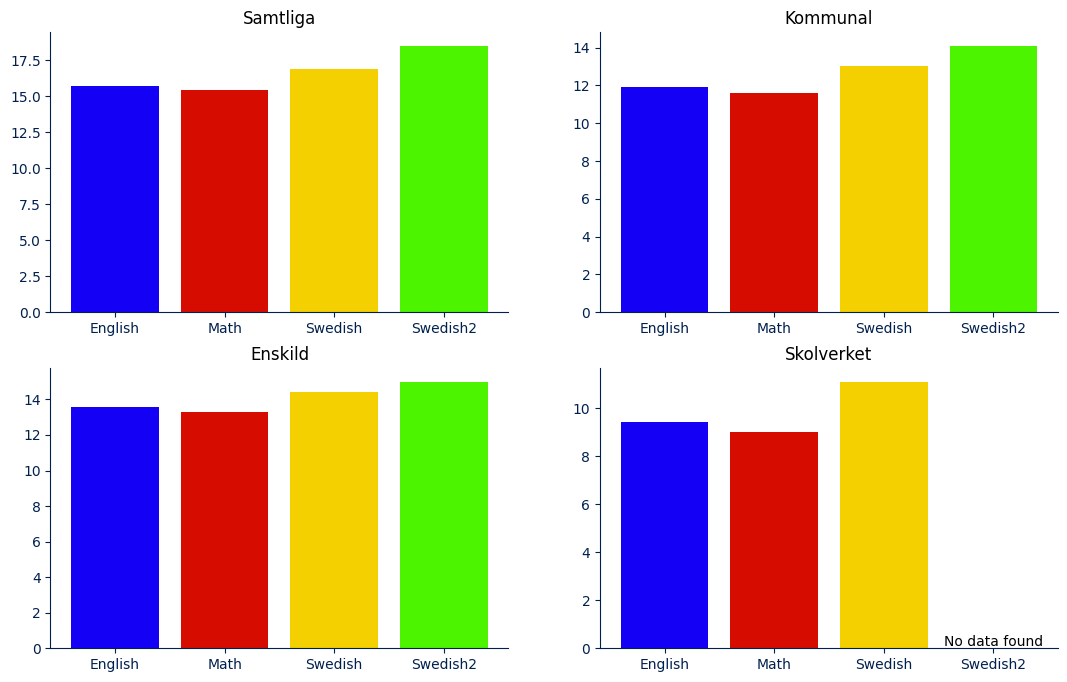

In [8]:
huvudmann= ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
fig, axs= plt.subplots(int(len(huvudmann)/2), int(len(huvudmann)/2), figsize= (13, 8))


for ax, df, huvudman in zip(axs.flatten(), dfs, huvudmann):

    ax.bar(subjects, df["Totalt(Poäng)"], color= bar_colors)
    
    for x, point in enumerate(df["Totalt(Poäng)"]):
        if point <= 0:
            ax.text(x-0.45, 0.1, "No data found")
    ax.set(title= huvudman)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(colors["BLUE2"])
    ax.spines["left"].set_color(colors["BLUE2"])
    ax.tick_params(colors= colors["BLUE2"])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    

# Betyg och prov / 1

## A)

In [9]:
df_1a= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1A", skiprows= 9)
df_1b= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1B", skiprows= 7)

In [10]:
df_1b.head()

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [11]:
df_1a.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955


In [12]:
df_1a.columns = [
    "Variabel",
    "Totalt",
    "Flickor",
    "Pojkar",
    "Totalt(A-F)",
    "Flickor(A-F)",
    "Pojkar(A-F)",
    "Totalt(A-E)",
    "Flickor(A-E)",
    "Pojkar(A-E)"
]
df_1b.columns= [
    "Variabel",
    "Totalt(Genomsnitt merit 16 ämnen)",
    "Flickor(Genomsnitt merit 16 ämnen)",
    "Pojkar(Genomsnitt merit 16 ämnen)",
    "Totalt(Genomsnitt merit 17 ämnen)",
    "Flickor(Genomsnitt merit 17 ämnen)",
    "Pojkar(Genomsnitt merit 17 ämnen)",
    "Totalt(% elever med ett F)",
    "% Flickor med minst ett F",
    "% Pojkar med minst ett F"
]

df_1a = df_1a.dropna()
df_1b = df_1b.dropna()
df_1b.head()

,Variabel,Totalt(Genomsnitt merit 16 ämnen),Flickor(Genomsnitt merit 16 ämnen),Pojkar(Genomsnitt merit 16 ämnen),Totalt(Genomsnitt merit 17 ämnen),Flickor(Genomsnitt merit 17 ämnen),Pojkar(Genomsnitt merit 17 ämnen),Totalt(% elever med ett F),% Flickor med minst ett F,% Pojkar med minst ett F
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [13]:
df_melted = pd.melt(
    df_1b[0:5],
    id_vars=["Variabel"],
    value_vars=[
        "Totalt(% elever med ett F)",
        "% Flickor med minst ett F",
        "% Pojkar med minst ett F",
    ],
    value_name="Andel F",
    var_name="Kategori",
)
fig = px.line(
    df_melted,
    x="Variabel",
    y="Andel F",
    line_dash="Kategori",
    labels= {"Andel F": "Andel av elever har underkänt i minst ett ämne", "Variabel": "Årtal"}
    
)
fig.show()

In [17]:
df_mean16 = pd.melt(
    df_1b[0:5],
    id_vars="Variabel",
    var_name="Kategori",
    value_vars={
        "Totalt(Genomsnitt merit 16 ämnen)",
        "Flickor(Genomsnitt merit 16 ämnen)",
        "Pojkar(Genomsnitt merit 16 ämnen)",
    },
    value_name="Meritvärde",
)
fig = px.line(
    df_mean16,
    x="Variabel",
    y="Meritvärde",
    line_dash= "Kategori"
)
fig.show()
df_mean16

,Variabel,Kategori,Meritvärde
0,2018/19,Totalt(Genomsnitt merit 16 ämnen),221.7
1,2019/20,Totalt(Genomsnitt merit 16 ämnen),222.9
2,2020/21,Totalt(Genomsnitt merit 16 ämnen),223.9
3,2021/22,Totalt(Genomsnitt merit 16 ämnen),221.2
4,2022/23,Totalt(Genomsnitt merit 16 ämnen),220.6
5,2018/19,Flickor(Genomsnitt merit 16 ämnen),234.3
6,2019/20,Flickor(Genomsnitt merit 16 ämnen),235.7
7,2020/21,Flickor(Genomsnitt merit 16 ämnen),235.4
8,2021/22,Flickor(Genomsnitt merit 16 ämnen),231.6
9,2022/23,Flickor(Genomsnitt merit 16 ämnen),229.7


## B)

In [15]:
mean_merit16= df_1b.loc[0:4, (categories[3], "Totalt")]
girls_merit16= df_1b.loc[0:4, (categories[3], "Flickor")]
boys_merit16= df_1b.loc[0:4, (categories[3], "Pojkar")]

NameError: name 'categories' is not defined

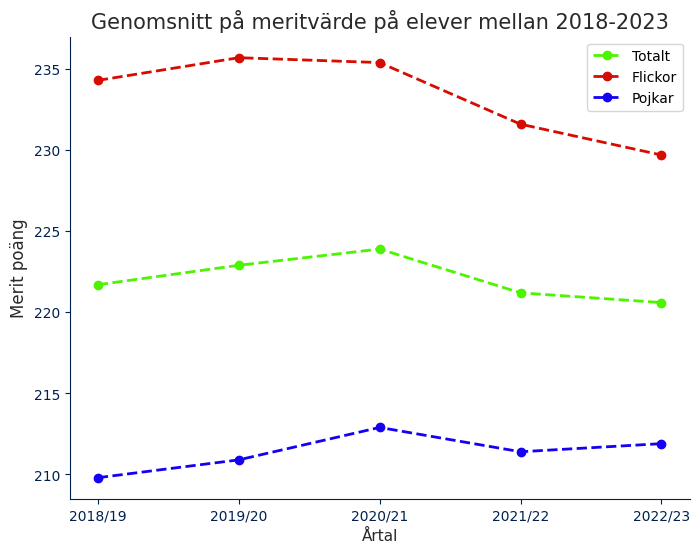

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title(
    "Genomsnitt på meritvärde på elever mellan 2018-2023",
    color=colors["GRAY1"],
    fontsize=15,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(colors["BLUE2"])
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.tick_params(colors=colors["BLUE2"])
ax.set_xlabel("Årtal", color=colors["GRAY1"], fontsize=11)
ax.set_ylabel("Merit poäng", color=colors["GRAY1"], fontsize=12)

ax.plot(
    years,
    mean_merit16,
    label="Totalt",
    color=colors["GREEN1"],
    marker="o",
    linestyle="dashed",
    linewidth=2,
)
ax.plot(
    years,
    girls_merit16,
    label="Flickor",
    color=colors["RED1"],
    marker="o",
    linestyle="dashed",
    linewidth=2,
)
ax.plot(
    years,
    boys_merit16,
    label="Pojkar",
    color=colors["BLUE1"],
    marker="o",
    linestyle="dashed",
    linewidth=2,
)
ax.legend(loc="upper right")

## C)

In [ ]:
categorie_c= df_1b[(categories[6], "Variabel")].iloc[10:]

total_values= df_1b[(categories[3], "Totalt")].iloc[10:]


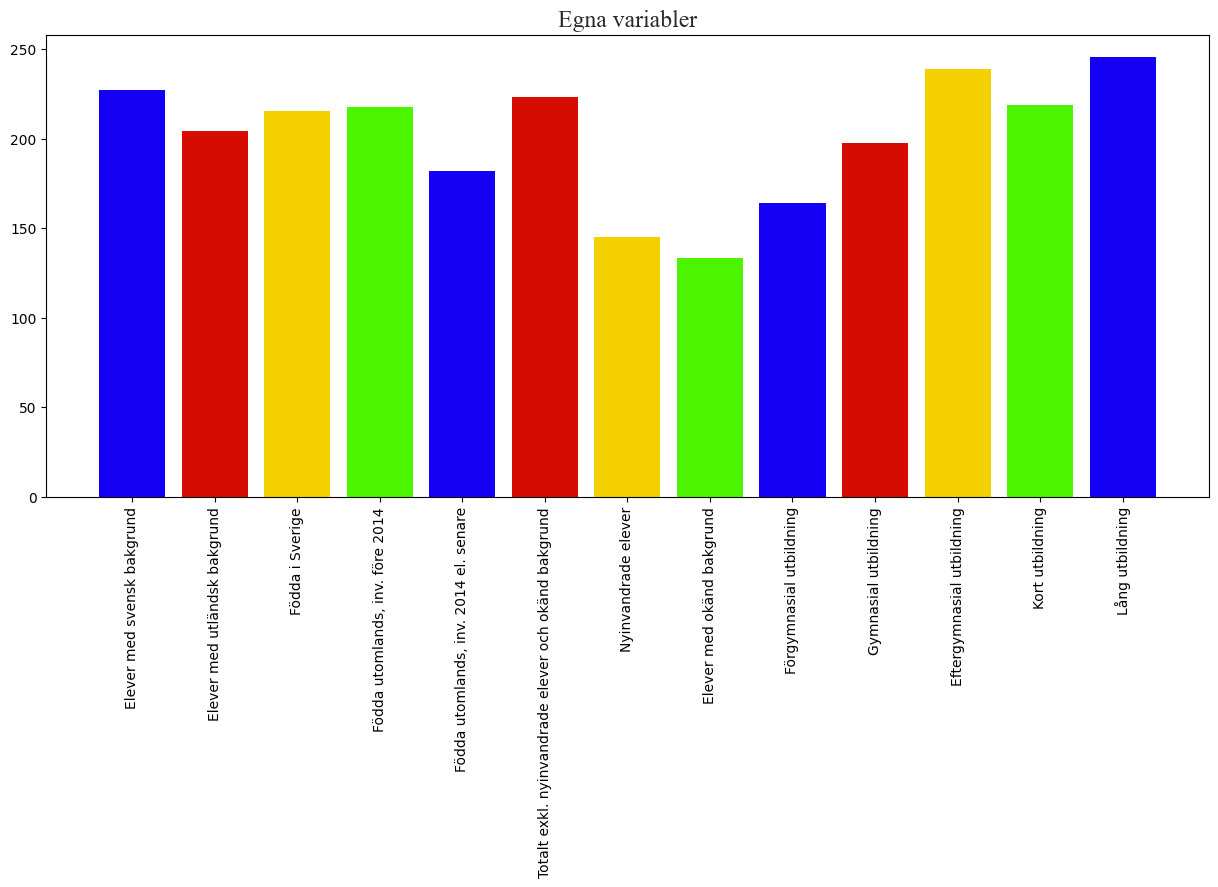

In [ ]:
fig, ax= plt.subplots(figsize= (15, 6))

ax.set_title("Egna variabler", color= colors["GRAY1"], fontdict= {"fontname": "Times New Roman", "fontsize": 17})
ax.tick_params(axis= "x", rotation= 90)

for categorie, merit16, color in zip(categorie_c, total_values, cycle(bar_colors)):    
    ax.bar(categorie, merit16, color= color)
    